In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from numpy.random import randn
import xgboost

<div class="alert alert-block alert-warning"><b>Example:</b> Use yellow boxes for examples that are not inside code cells, or use for mathematical formulas if needed. Typically also used to display warning messages.</div>

<div class="alert alert-block alert-danger"><b>Danger:</b> This alert box indicates a dangerous or potentially negative action.</div>

**Outra forma de acessar os dados IRIS**

In [ ]:
#from sklearn import datasets
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

In [ ]:
#print(iris)

In [ ]:
#X

In [ ]:
#y

# Iris Data

In [2]:
header_list = ["sepal length", "sepal width", "petal length",
               "petal width", "type"]

In [3]:
iris = pd.read_csv("/home/mpa/Downloads/iris.csv", 
                   names = header_list)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   type          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.head()

,sepal length,sepal width,petal length,petal width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


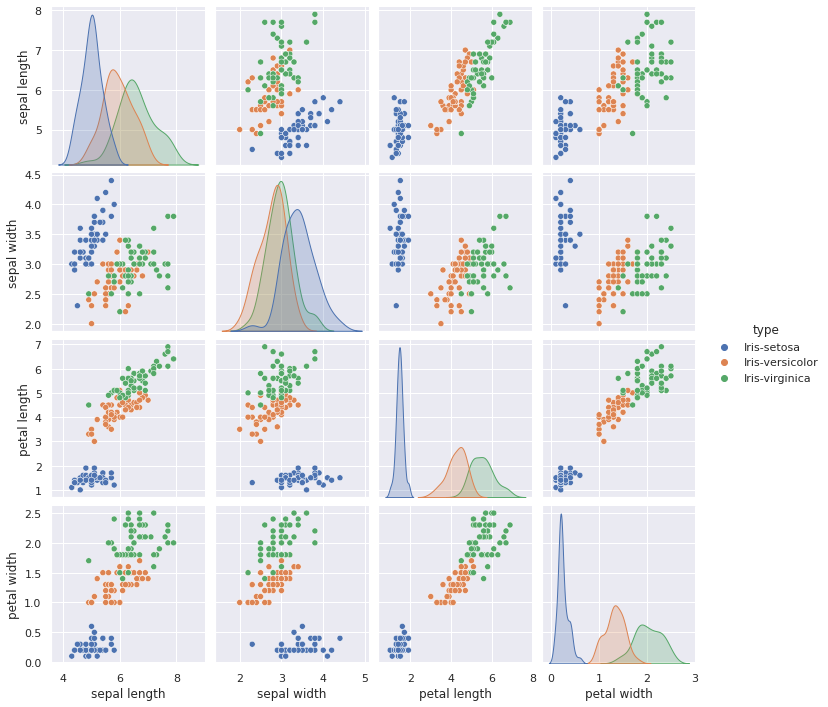

In [6]:
# Set default Seaborn style
sns.set()

_ = sns.pairplot(iris, hue = 'type')

In [7]:
iris.type.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: type, dtype: int64

In [8]:
iris['sepal length'].describe(percentiles = [0.5,0.97])

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
50%        5.800000
97%        7.653000
max        7.900000
Name: sepal length, dtype: float64

In [9]:
iris.describe(exclude = [np.number])

,type
count,150
unique,3
top,Iris-setosa
freq,50


In [10]:
iris.describe(exclude = [object], percentiles = [0.01, 0.1, 0.3, 0.97]) 

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
1%,4.400000,2.200000,1.149000,0.100000
10%,4.800000,2.500000,1.400000,0.200000
30%,5.270000,2.800000,1.700000,0.400000
50%,5.800000,3.000000,4.350000,1.300000
97%,7.653000,3.900000,6.353000,2.400000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
grupo_tipo_mediana = iris.groupby('type').median()
grupo_tipo_mediana

,sepal length,sepal width,petal length,petal width
type,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [12]:
type(grupo_tipo_mediana)

pandas.core.frame.DataFrame

In [14]:
grupo = iris.groupby('type')
type(grupo)

pandas.core.groupby.generic.DataFrameGroupBy

In [15]:
list(grupo)

[('Iris-setosa',
      sepal length  sepal width  petal length  petal width         type
  0            5.1          3.5           1.4          0.2  Iris-setosa
  1            4.9          3.0           1.4          0.2  Iris-setosa
  2            4.7          3.2           1.3          0.2  Iris-setosa
  3            4.6          3.1           1.5          0.2  Iris-setosa
  4            5.0          3.6           1.4          0.2  Iris-setosa
  5            5.4          3.9           1.7          0.4  Iris-setosa
  6            4.6          3.4           1.4          0.3  Iris-setosa
  7            5.0          3.4           1.5          0.2  Iris-setosa
  8            4.4          2.9           1.4          0.2  Iris-setosa
  9            4.9          3.1           1.5          0.1  Iris-setosa
  10           5.4          3.7           1.5          0.2  Iris-setosa
  11           4.8          3.4           1.6          0.2  Iris-setosa
  12           4.8          3.0           1.4  

In [16]:
list(grupo)[2]

('Iris-virginica',
      sepal length  sepal width  petal length  petal width            type
 100           6.3          3.3           6.0          2.5  Iris-virginica
 101           5.8          2.7           5.1          1.9  Iris-virginica
 102           7.1          3.0           5.9          2.1  Iris-virginica
 103           6.3          2.9           5.6          1.8  Iris-virginica
 104           6.5          3.0           5.8          2.2  Iris-virginica
 105           7.6          3.0           6.6          2.1  Iris-virginica
 106           4.9          2.5           4.5          1.7  Iris-virginica
 107           7.3          2.9           6.3          1.8  Iris-virginica
 108           6.7          2.5           5.8          1.8  Iris-virginica
 109           7.2          3.6           6.1          2.5  Iris-virginica
 110           6.5          3.2           5.1          2.0  Iris-virginica
 111           6.4          2.7           5.3          1.9  Iris-virginica
 112  

In [18]:
'''
dessa forma, filtra-se a coluna TYPE somente com a categoria "Iris_virginica" e 
simultaneamente apenas para os valores da coluna PETAL LENGTH
'''
virginica_petal_length = iris[iris['type'] == 'Iris-virginica']['petal length']
virginica_petal_length = virginica_petal_length.to_numpy()

In [19]:
type(virginica_petal_length)

numpy.ndarray

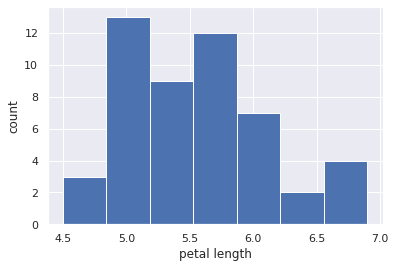

In [20]:
# Compute number of data points: n_data
n_data = len(virginica_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(virginica_petal_length, bins = n_bins)

# Label axes
_ = plt.xlabel('petal length')
_ = plt.ylabel('count')

# Show histogram
plt.show()

In [21]:
'''
dessa forma, filtra-se a coluna TYPE somente com a categoria "Iris-setosa" e 
simultaneamente apenas para os valores da coluna PETAL LENGTH
'''
setosa_petal_length = iris[iris['type'] == 'Iris-setosa']['petal length']
setosa_petal_length = setosa_petal_length.to_numpy()

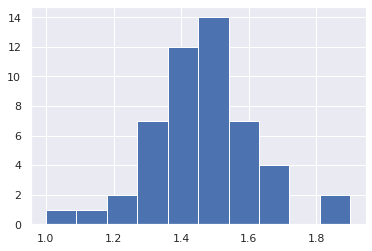

In [22]:
# Plot histogram of setosa petal lengths
_ = plt.hist(setosa_petal_length)

In [23]:
'''
dessa forma, filtra-se a coluna TYPE somente com a categoria "Iris-versicolor" e 
simultaneamente apenas para os valores da coluna PETAL LENGTH
'''
versicolor_petal_length = iris[iris['type'] == 'Iris-versicolor']['petal length']
versicolor_petal_length = versicolor_petal_length.to_numpy()

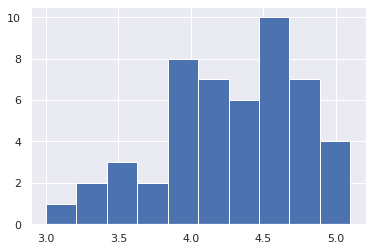

In [24]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

In [25]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

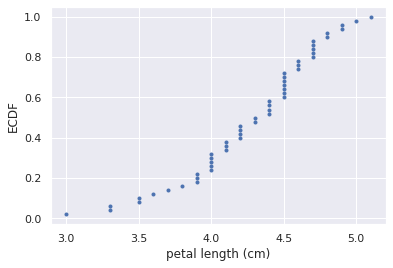

In [26]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

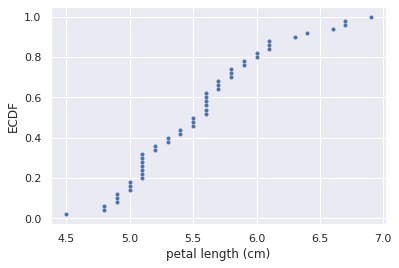

In [27]:
# Compute ECDF for virginica data: x_vers, y_vers
x_vers, y_vers = ecdf(virginica_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

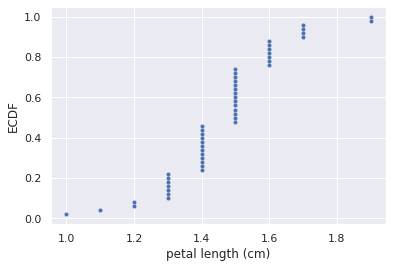

In [28]:
# Compute ECDF for setosa data: x_vers, y_vers
x_vers, y_vers = ecdf(setosa_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

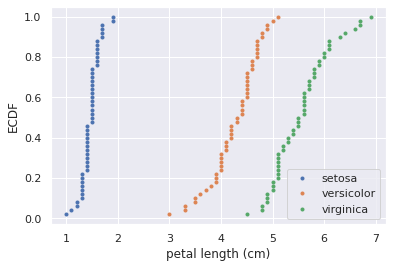

In [29]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker = '.', linestyle = 'none')
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.plot(x_virg, y_virg, marker = '.', linestyle = 'none')

# Annotate the plot
_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc = 'lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [33]:
base2 = iris[np.logical_and(iris["petal length"] > 4, iris["petal length"] < 6)]
print(base2)

     sepal length  sepal width  petal length  petal width             type
50            7.0          3.2           4.7          1.4  Iris-versicolor
51            6.4          3.2           4.5          1.5  Iris-versicolor
52            6.9          3.1           4.9          1.5  Iris-versicolor
54            6.5          2.8           4.6          1.5  Iris-versicolor
55            5.7          2.8           4.5          1.3  Iris-versicolor
..            ...          ...           ...          ...              ...
145           6.7          3.0           5.2          2.3   Iris-virginica
146           6.3          2.5           5.0          1.9   Iris-virginica
147           6.5          3.0           5.2          2.0   Iris-virginica
148           6.2          3.4           5.4          2.3   Iris-virginica
149           5.9          3.0           5.1          1.8   Iris-virginica

[73 rows x 5 columns]


<AxesSubplot:xlabel='sepal length', ylabel='type'>

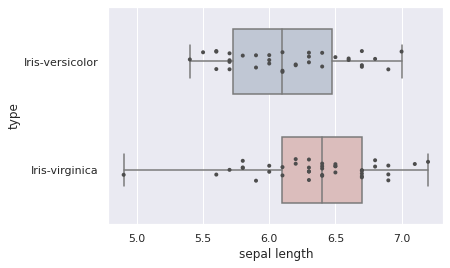

In [35]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="sepal length", y="type", data=base2,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="sepal length", y="type", data=base2,
              size=4, color=".3", linewidth=0)


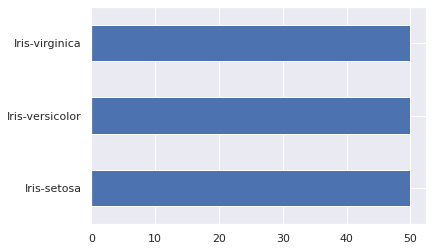

In [31]:
_ = iris["type"].value_counts().plot(kind = "barh")

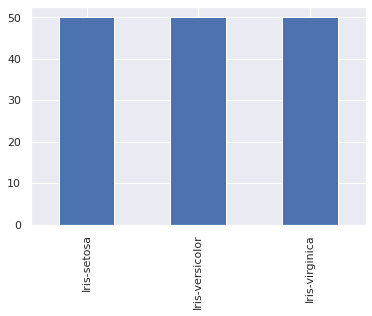

In [32]:
_ = iris["type"].value_counts().plot(kind = "bar")

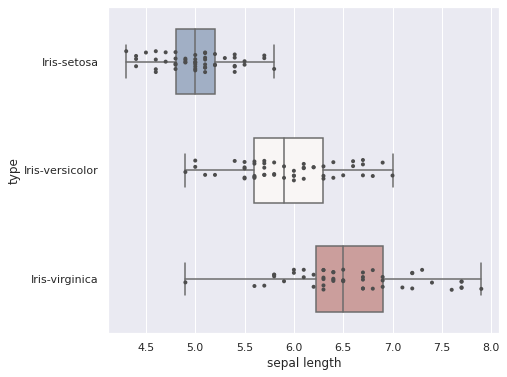

In [43]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="sepal length", y="type", data=iris,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="sepal length", y="type", data=iris,
              size=4, color=".3", linewidth=0)


# Tweak the visual presentation
ax.xaxis.grid(True)
#ax.set(ylabel="")
#sns.despine(trim=True, left=True)

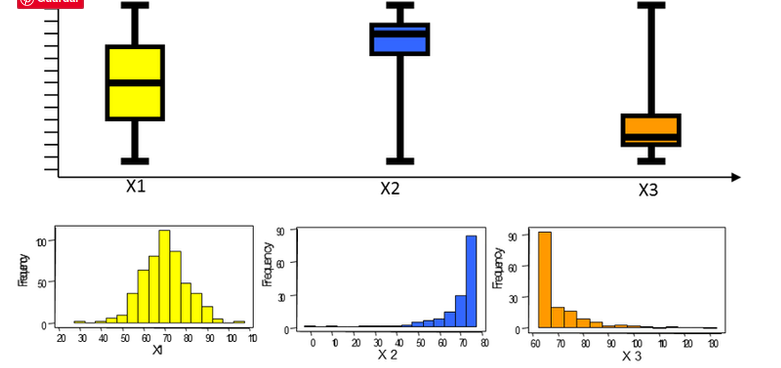

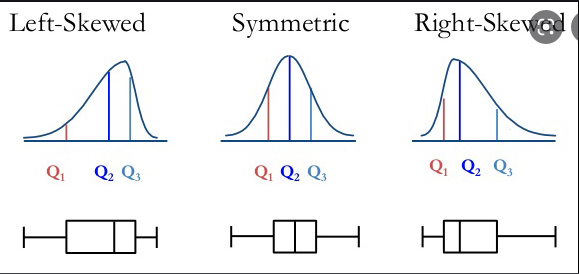